In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = [0.3, 0.5],
        m_rate = [0.2, 0.6],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5]))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

241496148511
update global 0.6165336537583966
came in: 308
to refresh 0
Iteration 147/300: 	0.6165336537583966
update global 0.6165336537583966
update global 0.6165185375748393
update global 0.616155463958455
came in: 331
to refresh 1
Iteration 148/300: 	0.616155463958455
update global 0.616155463958455
came in: 315
to refresh 0
Iteration 149/300: 	0.616155463958455
update global 0.616155463958455
came in: 316
to refresh 0
Iteration 150/300: 	0.616155463958455
update global 0.616155463958455
update global 0.6159741410585208
came in: 315
to refresh 1
Iteration 151/300: 	0.6159741410585208
update global 0.6159741410585208
update global 0.6159502546363902
came in: 318
to refresh 0
Iteration 152/300: 	0.6159502546363902
update global 0.6159502546363902
came in: 316
to refresh 0
Iteration 153/300: 	0.6159502546363902
update global 0.6159502546363902
update global 0.6158000197366019
update global 0.6156511395891137
update global 0.6152325924311843
came in: 326
to refresh 0
Iteration 154/300:

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.7501664206246349, 0.7501664206246349, 0.7501664206246349, 0.7501664206246349, 0.7501664206246349, 0.7501664206246349, 0.7501664206246349, 0.7500076293945312, 0.7101903184552059, 0.7101903184552059, 0.7101903184552059, 0.7101903184552059, 0.7101903184552059, 0.7101903184552059, 0.7101903184552059, 0.7091651274779133, 0.7091651274779133, 0.7091651274779133, 0.7088921092380988, 0.7088921092380988, 0.7088921092380988, 0.7088921092380988, 0.7088921092380988, 0.7062259567118137, 0.7062259567118137, 0.7062259567118137, 0.7062259567118137, 0.7062259567118137, 0.699403780643071, 0.699403780643071, 0.6643840041116019, 0.6643840041116019, 0.6643840041116019, 0.6643840041116019, 0.6643840041116019, 0.6643840041116019, 0.6643840041116019, 0.6640426778347692, 0.6640426778347692, 0.6640426778347692, 0.6640426778347692, 0.6640426778347692, 0.6637717986775336, 0.6637717986775336, 0.6637717986775336, 0.6636647019430856, 0.6636647019430856, 0.6612683590327468, 0.6612683590327468, 0.6604428157628139, 0

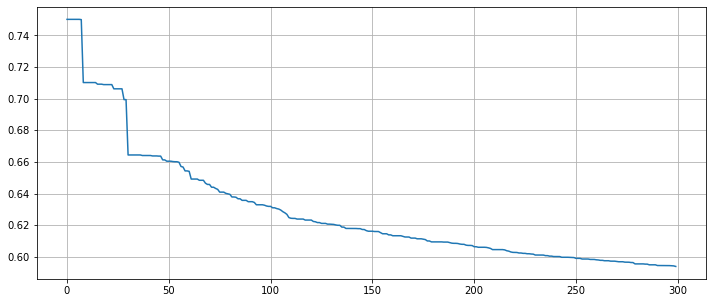

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.84509623]
 [0.10317229]
 [0.0517315 ]]
[1. 0. 0.] <-> [[0.8971902 ]
 [0.07002997]
 [0.03277981]]
[1. 0. 0.] <-> [[0.9085559 ]
 [0.06248789]
 [0.02895615]]
[1. 0. 0.] <-> [[0.7541763 ]
 [0.16406073]
 [0.08176292]]
[1. 0. 0.] <-> [[0.8974631 ]
 [0.06991168]
 [0.03262523]]
[1. 0. 0.] <-> [[0.7274568 ]
 [0.15824485]
 [0.11429834]]
[0. 0. 1.] <-> [[0.04642199]
 [0.35770592]
 [0.5958721 ]]
[1. 0. 0.] <-> [[0.89868087]
 [0.06920668]
 [0.03211248]]
[1. 0. 0.] <-> [[0.5212194 ]
 [0.37162757]
 [0.10715303]]
[1. 0. 0.] <-> [[0.86189157]
 [0.09161891]
 [0.0464896 ]]
[0. 0. 1.] <-> [[0.10882017]
 [0.36903444]
 [0.5221454 ]]
[0. 1. 0.] <-> [[0.04284679]
 [0.35436958]
 [0.6027837 ]]
[0. 1. 0.] <-> [[0.05901951]
 [0.3666953 ]
 [0.5742852 ]]
[1. 0. 0.] <-> [[0.89933485]
 [0.06878451]
 [0.03188069]]
[1. 0. 0.] <-> [[0.90970856]
 [0.06169071]
 [0.02860075]]
[0. 1. 0.] <-> [[0.38195002]
 [0.27943712]
 [0.33861282]]
[0. 1. 0.] <-> [[0.48574695]
 [0.4090808 ]
 [0.10517219]]
[1. 0. 0.] <->